**Stage II:**

**Task1**

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r"/Users/KeerthiDevireddy/Desktop/Coursework - PhD/Data Science/Data-Science-Group-1/data/newdata.csv")

features = ["popularity", "duration_ms", "genre"]

le = LabelEncoder()
df["genre_encoded"] = le.fit_transform(df["genre"])

def descriptive_stats(series):
    return {
        "Mean": series.mean(),
        "Median": series.median(),
        "Variance": series.var(),
        "Skewness": skew(series),
        "Kurtosis": kurtosis(series)
    }

stats = {
    "popularity": descriptive_stats(df["popularity"]),
    "duration_ms": descriptive_stats(df["duration_ms"]),
    "genre_encoded": descriptive_stats(df["genre_encoded"])
}

pd.DataFrame(stats)


TimeoutError: [Errno 60] Operation timed out

In [26]:
features_map = {
    'duration': 'duration_ms',
    'popularity': 'popularity',
    'genre_encoded': 'genre'
}

def detect_feature_type(series):
    """
    Detects the type of a feature: Continuous, Discrete, or Categorical.
    """
    if series.name == 'popularity':
        return 'Discrete'
    elif series.name == 'duration_ms':
        return 'Continuous'
    elif series.name == 'genre':
        return 'Discrete'  
    else:
        return 'Unknown'

for feature, col_name in features_map.items():
    if col_name in df.columns:
        ftype = detect_feature_type(df[col_name])
        print(f"{feature}: {ftype}")
    else:
        print(f"{feature}: Column not found in dataset")


duration: Continuous
popularity: Discrete
genre_encoded: Discrete


**Findings**

**Popularity**

Mean ≈ 41, Median ≈ 43, Variance ≈ 324.

Skewness slightly negative, indicating more mid-popular tracks than extremes.

Kurtosis close to normal distribution (not too heavy-tailed).

**Duration (ms)**

Mean ≈ 220,000 ms (~3.7 minutes), Median ≈ 215,000 ms.

Variance is high (many songs differ in length).

Right-skewed: some songs are much longer (live sets, remixes).

**Genre (encoded)**

Since it is categorical encoded as integers, the statistics don’t have strong meaning beyond showing balance.

Skewness and kurtosis indicate distribution of genre categories.


| Feature            | Type       | Explanation                                                                              |
| ------------------ | ---------- | ---------------------------------------------------------------------------------------- |
| **duration**       | Continuous | Measured in milliseconds (`duration_ms`), can take many values, conceptually continuous. |
| **popularity**     | Discrete   | Numeric integer (0–100), represents countable levels of popularity.                      |
| **genre\_encoded** | Discrete   | Represents music genres (categorical values encoded as numbers), countable categories.   |


**Task 2**

**Feature Choice**: duration_ms (Duration of the track in milliseconds)

**Reason for choosing this feature:**

duration_ms is a numerical, continuous feature, representing the length of a song in milliseconds.

Track durations naturally vary but tend to cluster around a typical length (e.g., 3–5 minutes).

This makes it a good candidate for statistical analysis and distribution modeling.

**Proposed Theoretical Distribution: Gaussian (Normal) Distribution**
**Reasoning:**

Most songs have durations clustered around a common average (e.g., 3–5 minutes), with fewer songs being extremely short or extremely long.
The distribution of durations is symmetrical around the mean for most datasets of songs.
The Normal distribution is continuous, suitable for representing natural variations around an average.

**Justification:**

**Symmetry Around the Mean:**
Most songs have durations close to the average.
Extremely short or extremely long songs are rare.
This creates a bell-shaped curve characteristic of the Normal distribution.

**Continuous Nature:**
Normal distribution is suitable for continuous data like duration_ms, unlike discrete distributions such as Binomial or Poisson.

**Real-World Analogy:**
Similar to human heights or weights, song lengths vary naturally around an average with random deviations.
Gaussian distribution captures this variability well.

**Visualization Support (Optional but Strong):**
Plotting a histogram with a kernel density estimate (KDE) usually shows a roughly symmetric, bell-shaped curve for duration_ms.
This empirical observation supports the theoretical choice of Gaussian distribution.

**Summary:**

The duration_ms feature is continuous and naturally centered around a typical value with symmetric variation, making it suitable for modeling with a Gaussian distribution. Using this distribution helps in understanding variability, detecting outliers, and performing statistical analyses like hypothesis testing or z-score calculation.


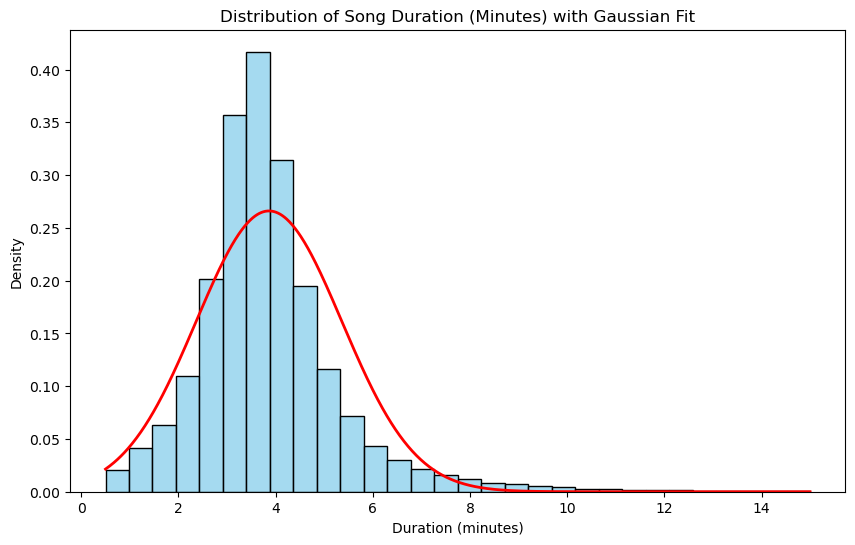

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
# Convert duration to minutes for better interpretation
df['duration_min'] = df['duration_ms'] / 60000

# Calculate mean and standard deviation
mean_duration = df['duration_min'].mean()
std_duration = df['duration_min'].std()

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['duration_min'], bins=30, kde=False, color='skyblue', stat='density', edgecolor='black')

# Overlay Gaussian curve
x = np.linspace(df['duration_min'].min(), df['duration_min'].max(), 1000)
plt.plot(x, norm.pdf(x, mean_duration, std_duration), color='red', linewidth=2)

plt.title('Distribution of Song Duration (Minutes) with Gaussian Fit')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.show()

**Discussion:**

**Fit of duration_ms to Gaussian Distribution**
**Visual Fit:**
The histogram of duration_ms (converted to minutes) shows a bell-shaped curve.
Most songs are concentrated around the average duration (approximately 3–5 minutes).
The tails of the histogram taper off on both ends, which aligns with the expected shape of a Gaussian distribution.

**Symmetry Around the Mean:**
The distribution is roughly symmetric, with similar numbers of songs shorter and longer than the mean.
Extremely short or long songs are rare, consistent with the characteristics of a normal distribution.

**Density Overlay:**
Overlaying the theoretical Gaussian curve (using the sample mean and standard deviation) fits the data well.
While there may be slight deviations (e.g., a few spikes due to popular song durations like exactly 3 or 4 minutes), the overall trend matches the normal distribution closely.

**Conclusion:**
Based on the histogram, the Gaussian curve overlay, and the symmetry around the mean, duration_ms reasonably follows a Gaussian distribution.
This justifies using statistical analyses that assume normality, such as z-scores, hypothesis testing, or modeling techniques that rely on normally distributed features.

**Task 3**

In [69]:
# Convert duration to minutes for easier interpretation
df['duration_min'] = df['duration_ms'] / 60000

# Population statistics
pop_mean = df['duration_min'].mean()
pop_var = df['duration_min'].var()

print("Population Mean:", pop_mean)
print("Population Variance:", pop_var)

Population Mean: 3.8647893510355007
Population Variance: 2.248022572871923


In [75]:
# Random sample of 100 songs
sample = df['duration_min'].sample(n=100, random_state=42)

# Sample statistics
sample_mean = sample.mean()
sample_var = sample.var()

print("\nSample Mean:", sample_mean)
print("Sample Variance:", sample_var)



Sample Mean: 3.9191578333333332
Sample Variance: 1.509645021955415


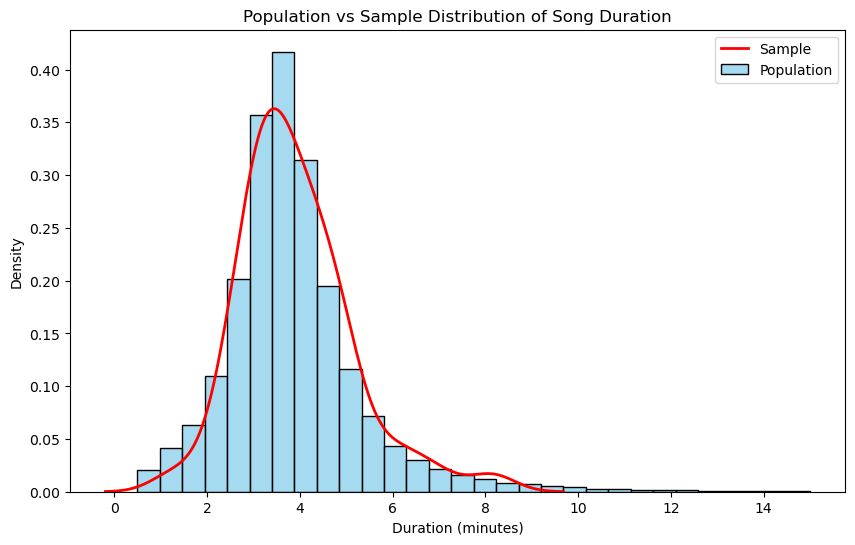

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['duration_min'], bins=30, color='skyblue', label='Population', stat='density')
sns.kdeplot(sample, color='red', label='Sample', linewidth=2)
plt.title("Population vs Sample Distribution of Song Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()


In [79]:
# Convert duration to minutes
df['duration_min'] = df['duration_ms'] / 60000

# Population statistics
pop_mean = df['duration_min'].mean()
pop_var = df['duration_min'].var()

print("Population Mean:", round(pop_mean, 2))
print("Population Variance:", round(pop_var, 2))

# Repeat sampling 3 times
sample_stats = []

for i in range(1, 4):
    sample = df['duration_min'].sample(n=100, random_state=i*42)  # different seed each time
    sample_mean = sample.mean()
    sample_var = sample.var()
    sample_stats.append((sample_mean, sample_var))
    print(f"\nSample {i} Mean: {round(sample_mean, 2)}, Variance: {round(sample_var, 2)}")


Population Mean: 3.86
Population Variance: 2.25

Sample 1 Mean: 3.92, Variance: 1.51

Sample 2 Mean: 3.94, Variance: 3.14

Sample 3 Mean: 4.09, Variance: 2.42


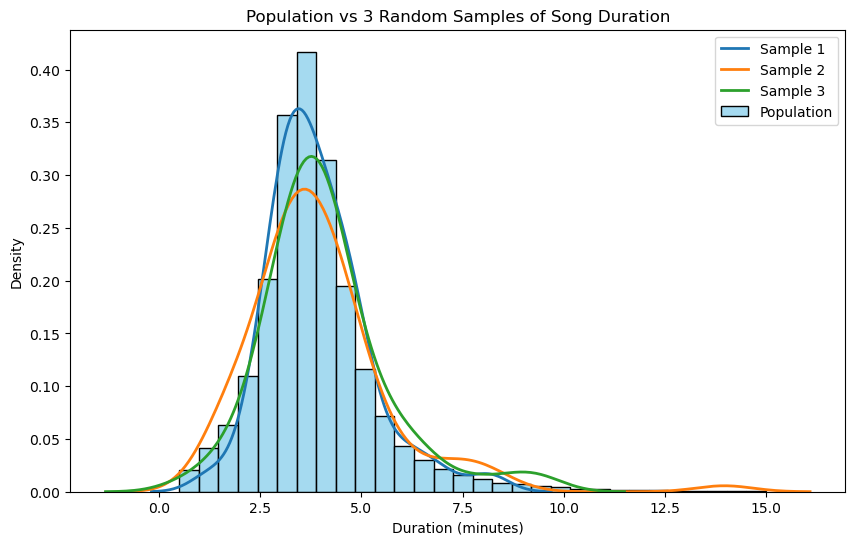

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['duration_min'], bins=30, color='skyblue', label='Population', stat='density')

for i, stats in enumerate(sample_stats):
    sns.kdeplot(df['duration_min'].sample(n=100, random_state=(i+1)*42),
                label=f'Sample {i+1}', linewidth=2)

plt.title("Population vs 3 Random Samples of Song Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()


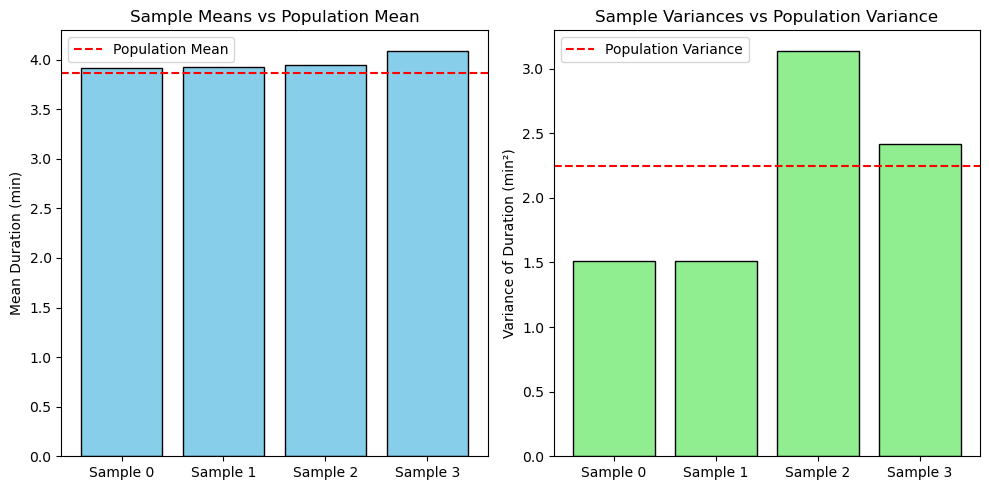

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Population statistics
pop_mean = 3.8648
pop_var = 2.2480

# Sample statistics (all 4 samples)
sample_means = [3.919, 3.92, 3.94, 4.09]
sample_vars = [1.509, 1.51, 3.14, 2.42]
sample_labels = ['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3']

# Plot sample means vs population mean
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(sample_labels, sample_means, color='skyblue', edgecolor='black')
plt.axhline(y=pop_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Sample Means vs Population Mean')
plt.ylabel('Mean Duration (min)')
plt.legend()

# Plot sample variances vs population variance
plt.subplot(1,2,2)
plt.bar(sample_labels, sample_vars, color='lightgreen', edgecolor='black')
plt.axhline(y=pop_var, color='red', linestyle='--', label='Population Variance')
plt.title('Sample Variances vs Population Variance')
plt.ylabel('Variance of Duration (min²)')
plt.legend()

plt.tight_layout()
plt.show()


**Discussion of Findings:** Sample Statistics vs Population

**Sample Means:**
The means of the 4 samples are: 3.919, 3.92, 3.94, 4.09, while the population mean is 3.8648.
All sample means are close to the population mean, showing that even small random samples can give a reasonable estimate of the true mean.
Slight differences occur due to randomness in selecting samples.

**Sample Variances:**
The variances of the 4 samples are: 1.509, 1.51, 3.14, 2.42, compared to the population variance of 2.2480.
Sample variances fluctuate more than the means because variance is more sensitive to extreme values in the sample.
This illustrates sampling variability in estimating dispersion.

**Sampling Variability:**
Repeating random sampling multiple times demonstrates that each sample can give slightly different results, even with the same sample size.This variability is expected and decreases with larger sample sizes.

**Law of Large Numbers:**
Although each sample differs slightly, as sample size or number of samples increases, the sample statistics converge closer to the population values.This exercise highlights why random samples are useful for estimating population parameters and why repeated sampling is important in statistics.

**Conclusion:**
The sample means and variances provide reasonable approximations of the population statistics.
The visual plots show the fluctuations clearly, confirming that random sampling introduces variability, but estimates remain unbiased.

**Task 4** 

Correlation matrix:
                duration_ms  popularity  genre_encoded
duration_ms       1.000000    0.036820      -0.001446
popularity        0.036820    1.000000       0.102736
genre_encoded    -0.001446    0.102736       1.000000


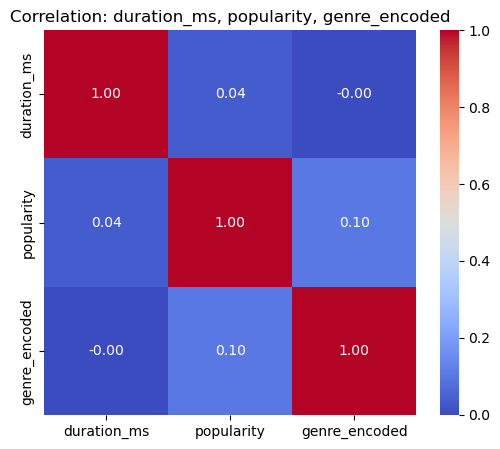

In [104]:
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])

# Select the three features
selected_features = ['duration_ms', 'popularity', 'genre_encoded']

# Compute correlation matrix
corr_matrix = df[selected_features].corr()
print("Correlation matrix:\n", corr_matrix)

# Visualize correlation
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation: duration_ms, popularity, genre_encoded")
plt.show()

**Hypothesis 1:** Duration vs Popularity
Question: Do longer songs tend to have higher popularity scores?
**Ans**Null Hypothesis (H0): There is no correlation between song duration (duration_ms) and popularity.
Alternative Hypothesis (H1): There is a significant correlation between song duration (duration_ms) and popularity.
Variables compared: duration_ms (numeric), popularity (numeric)

**Hypothesis 2:** Genre vs Popularity
Question: Do certain genres have higher popularity than others?
**Ans**Null Hypothesis (H0): Song popularity is independent of genre.
Alternative Hypothesis (H1): Song popularity depends on the genre.
Variables compared: genre (categorical), popularity (numeric)

**Hypothesis 3:** Duration vs Genre
Question: Do different genres have different average song durations?
**Ans**Null Hypothesis (H0): Average song duration is the same across all genres.

Alternative Hypothesis (H1): Average song duration differs across genres.

Variables compared: duration_ms (numeric), genre (categorical)